In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/aditi/Downloads/test_rows.csv")
print(data.head())
print(data.info())
print(data.describe())

   RPA2_3  ZYG11A_4   F5_2  HOXC4_1  NKIRAS2_2  MEIS1_1  SAMD10_2  GRM2_9  \
0   65.96     18.08  41.57    55.46      30.69    63.42     40.86   68.88   
1   66.83     20.27  40.55    49.67      29.53    30.47     37.73   53.30   
2   50.30     11.74  40.17    33.85      23.39    58.83     38.84   35.08   
3   65.54     15.56  33.56    36.79      20.23    56.39     41.75   50.37   
4   59.01     14.38  41.95    30.30      24.99    54.40     37.38   30.35   

   TRIM59_5  LDB2_3  ELOVL2_6  DDO_1  KLF14_2  
0     44.32   56.17     62.29  40.99     2.30  
1     50.09   58.40     61.10  49.73     1.07  
2     35.90   58.81     50.38  63.03     0.95  
3     41.46   58.05     50.58  62.13     1.99  
4     31.28   65.80     48.74  41.88     0.90  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RPA2_3     104 non-null    float64
 1   ZYG11A_4   104 non-

In [3]:
#removing empty columns
data_cleaned = data.dropna(how='all') 
data_cleaned = data_cleaned.dropna(axis=1, how='all')

In [5]:
data.columns = data.columns.str.strip().str.replace('\n', ' ').str.replace('\r', ' ')
print(data.columns)

Index(['RPA2_3', 'ZYG11A_4', 'F5_2', 'HOXC4_1', 'NKIRAS2_2', 'MEIS1_1',
       'SAMD10_2', 'GRM2_9', 'TRIM59_5', 'LDB2_3', 'ELOVL2_6', 'DDO_1',
       'KLF14_2'],
      dtype='object')


In [7]:
from sklearn.preprocessing import StandardScaler
numeric_data = data.select_dtypes(include=[float, int])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

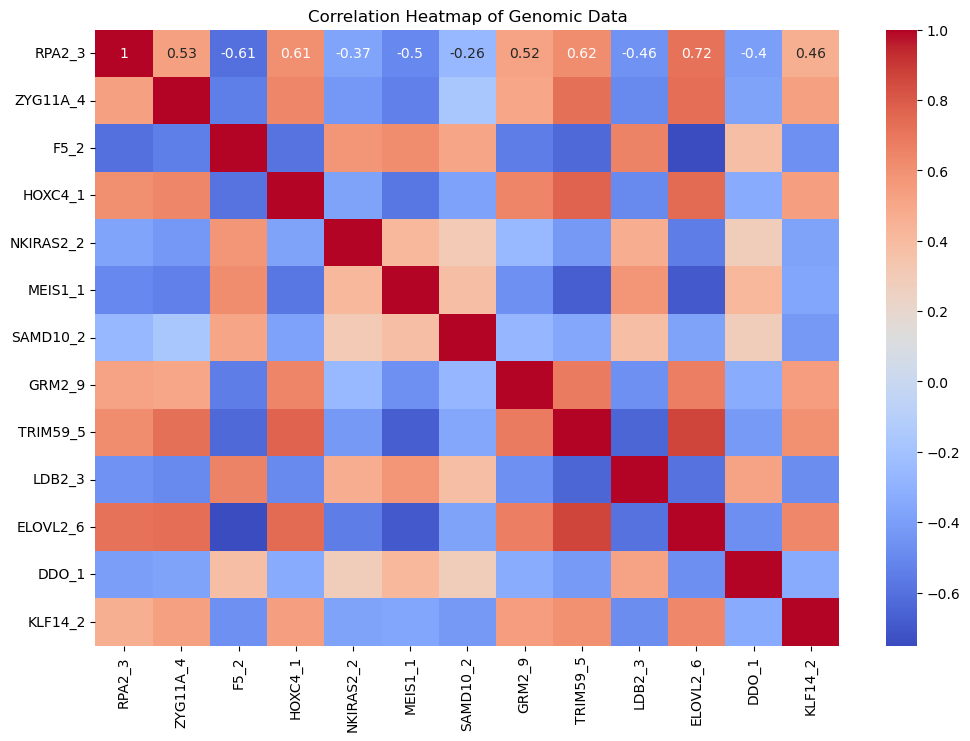

In [9]:
#correlation map
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Genomic Data')
plt.show()

In [10]:
from sklearn.impute import SimpleImputer
scaled_data = scaled_data[~np.isnan(scaled_data).any(axis=1)]
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent'
scaled_data = imputer.fit_transform(scaled_data)
print("Number of NaNs in scaled data:", np.isnan(scaled_data).sum())

Number of NaNs in scaled data: 0


In [13]:
print(scaled_data.shape)  # (n_samples, n_features)

(104, 13)


In [15]:
from sklearn.decomposition import PCA
n_components = min(scaled_data.shape)  
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

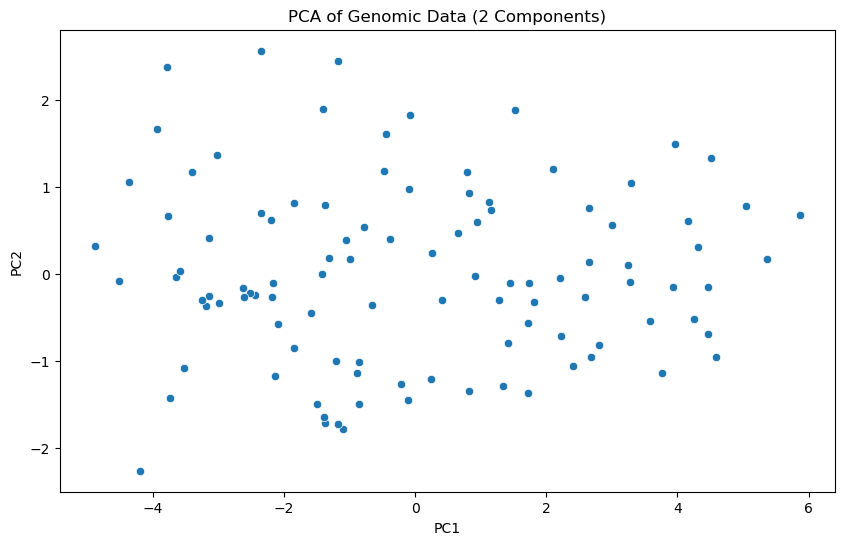

In [17]:
#scatter plot
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
if pca_result.shape[1] == 1:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pca_df['PC1'], y=[0] * len(pca_df))  # Y = 0 as a dummy value
    plt.title('PCA of Genomic Data (1 Component)')
    plt.show()
else:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PC1', y='PC2', data=pca_df)
    plt.title('PCA of Genomic Data (2 Components)')
    plt.show()

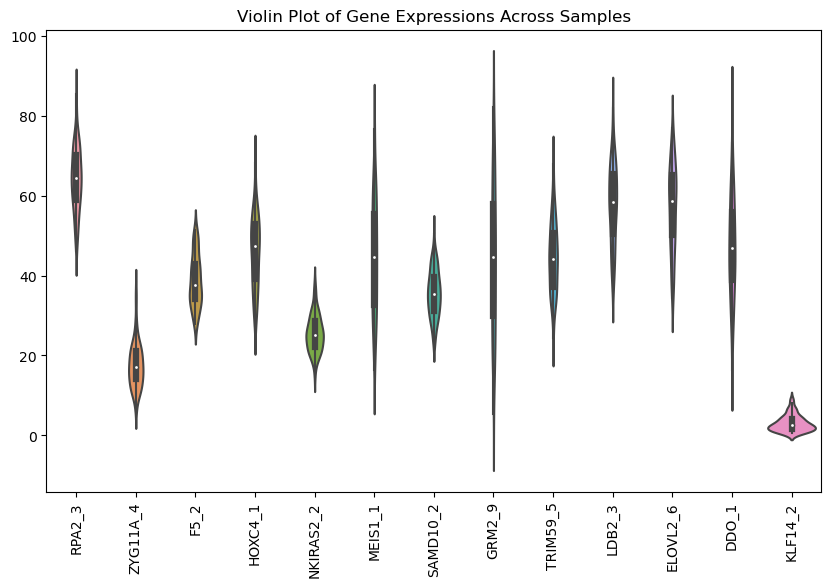

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("C:/Users/aditi/Downloads/test_rows.csv")
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.violinplot(data=numeric_data)
plt.title('Violin Plot of Gene Expressions Across Samples')
plt.xticks(rotation=90)
plt.show()

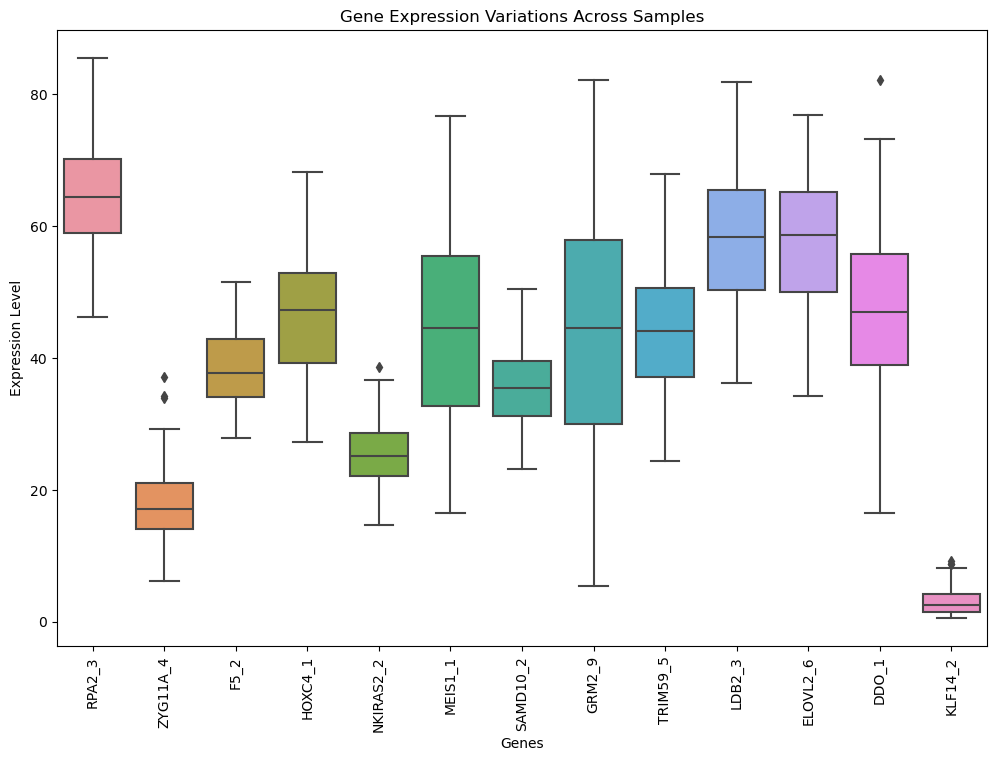

In [21]:
#Box plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/aditi/Downloads/test_rows.csv")
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_data)
plt.xticks(rotation=90)  
plt.title('Gene Expression Variations Across Samples')
plt.xlabel('Genes')
plt.ylabel('Expression Level')
plt.show()

C:\Users\aditi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


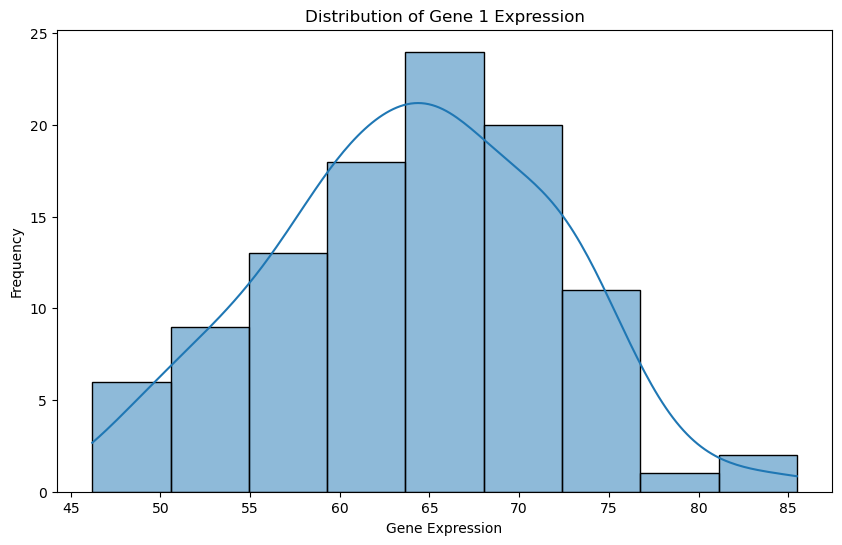

In [23]:
#Histogram

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/aditi/Downloads/test_rows.csv")
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.histplot(numeric_data.iloc[:, 0], kde=True)  
plt.title('Distribution of Gene 1 Expression')
plt.xlabel('Gene Expression')
plt.ylabel('Frequency')
plt.show()

In [25]:
# grid search

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    scores.append(score)
optimal_k = np.argmax(scores) + 2  
print(f"Optimal number of clusters: {optimal_k}")

C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Optimal number of clusters: 2


In [26]:
#Evaluating K-Means using the Silhouette Score

from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {score}")

C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.19390289604042427


In [28]:
#Evaluating K-Means using the Silhouette Score

from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {score}")

C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.19390289604042427


   RPA2_3  ZYG11A_4   F5_2  HOXC4_1  NKIRAS2_2  MEIS1_1  SAMD10_2  GRM2_9  \
0   65.96     18.08  41.57    55.46      30.69    63.42     40.86   68.88   
1   66.83     20.27  40.55    49.67      29.53    30.47     37.73   53.30   
2   50.30     11.74  40.17    33.85      23.39    58.83     38.84   35.08   
3   65.54     15.56  33.56    36.79      20.23    56.39     41.75   50.37   
4   59.01     14.38  41.95    30.30      24.99    54.40     37.38   30.35   

   TRIM59_5  LDB2_3  ELOVL2_6  DDO_1  KLF14_2  
0     44.32   56.17     62.29  40.99     2.30  
1     50.09   58.40     61.10  49.73     1.07  
2     35.90   58.81     50.38  63.03     0.95  
3     41.46   58.05     50.58  62.13     1.99  
4     31.28   65.80     48.74  41.88     0.90  


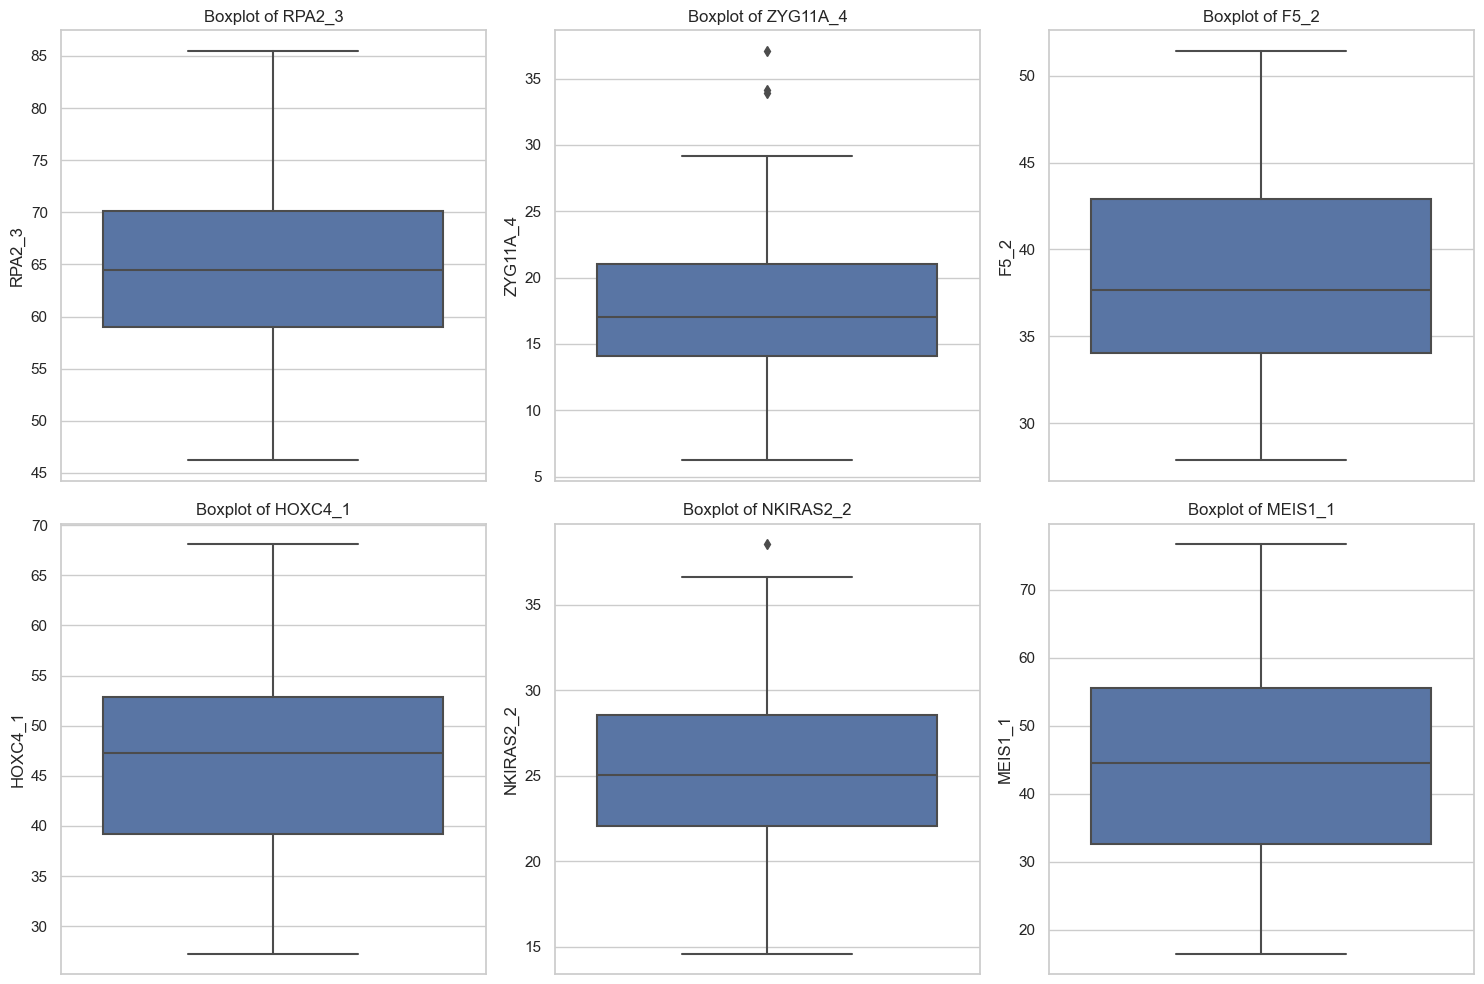

RPA2_3: 0 outliers detected
ZYG11A_4: 3 outliers detected
F5_2: 0 outliers detected
HOXC4_1: 0 outliers detected
NKIRAS2_2: 1 outliers detected
MEIS1_1: 0 outliers detected
SAMD10_2: 0 outliers detected
GRM2_9: 0 outliers detected
TRIM59_5: 0 outliers detected
LDB2_3: 0 outliers detected
ELOVL2_6: 0 outliers detected
DDO_1: 1 outliers detected
KLF14_2: 3 outliers detected


In [31]:
#Detecting outliers from the dataset

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('C:/Users/aditi/Downloads/test_rows.csv')  
numeric_data = data.select_dtypes(include=[np.number])
print(numeric_data.head())
sns.set(style='whitegrid')
numerical_columns = numeric_data.columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns[:6], 1):  
    plt.subplot(2, 3, i)
    sns.boxplot(y=numeric_data[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()
outlier_info = {}
for column in numerical_columns:
    Q1 = numeric_data[column].quantile(0.25)
    Q3 = numeric_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((numeric_data[column] < lower_bound) | (numeric_data[column] > upper_bound)).sum()
    outlier_info[column] = outliers

for column, count in outlier_info.items():
    print(f"{column}: {count} outliers detected")

In [32]:
#Varience thresholding

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
df = pd.read_csv('C:/Users/aditi/Downloads/test_rows.csv')
numeric_data = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
selector = VarianceThreshold(threshold=0.01)
selected_features = selector.fit_transform(scaled_data)
selected_feature_names = numeric_data.columns[selector.get_support()]
print("Selected Features After Variance Thresholding:")
print(selected_feature_names)

Selected Features After Variance Thresholding:
Index(['RPA2_3', 'ZYG11A_4', 'F5_2', 'HOXC4_1', 'NKIRAS2_2', 'MEIS1_1',
       'SAMD10_2', 'GRM2_9', 'TRIM59_5', 'LDB2_3', 'ELOVL2_6', 'DDO_1',
       'KLF14_2'],
      dtype='object')


C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.2213


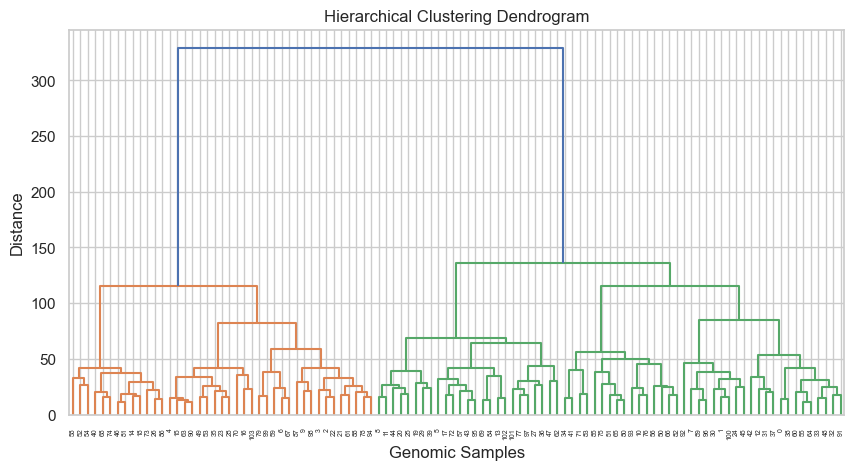

In [35]:
# Hierarchical clustering code 

import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.decomposition import PCA  
from sklearn.cluster import KMeans  
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn.metrics import silhouette_score    
data = pd.read_csv("C:/Users/aditi/Downloads/test_rows.csv")    
pca = PCA(n_components=10)  
principal_components = pca.fit_transform(data)   
kmeans = KMeans(n_clusters=4, random_state=42)  
clusters = kmeans.fit_predict(principal_components)    
silhouette_avg = silhouette_score(principal_components, clusters)  
print(f"Silhouette Score: {silhouette_avg:.4f}")    
linkage_matrix = linkage(principal_components, method='ward')  
plt.figure(figsize=(10, 5))  
dendrogram(linkage_matrix)  
plt.title('Hierarchical Clustering Dendrogram')  
plt.xlabel('Genomic Samples')  
plt.ylabel('Distance')  
plt.show() 

C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

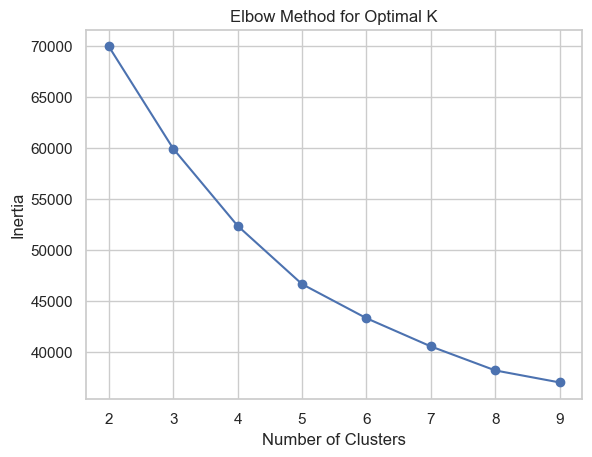

In [36]:
#Feature Selection and Clustering Optimization

from sklearn.feature_selection import VarianceThreshold  
from sklearn.model_selection import GridSearchCV   
selector = VarianceThreshold(threshold=0.01)  
selected_features = selector.fit_transform(data)   
inertia = []  
k_range = range(2, 10)  
for k in k_range:  
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(principal_components)  
    inertia.append(kmeans.inertia_)
plt.plot(k_range, inertia, marker='o')  
plt.xlabel('Number of Clusters')  
plt.ylabel('Inertia')  
plt.title('Elbow Method for Optimal K')  
plt.show()  

2025-02-07 18:12:29.176 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-02-07 18:12:29.179 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-02-07 18:12:29.181 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-07 18:12:30.522 
  command:

    streamlit run C:\Users\aditi\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-07 18:12:30.523 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-07 18:12:30.525 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-07 18:12:30.536 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-07 18:12:30.542 Thread 'MainThread': missin

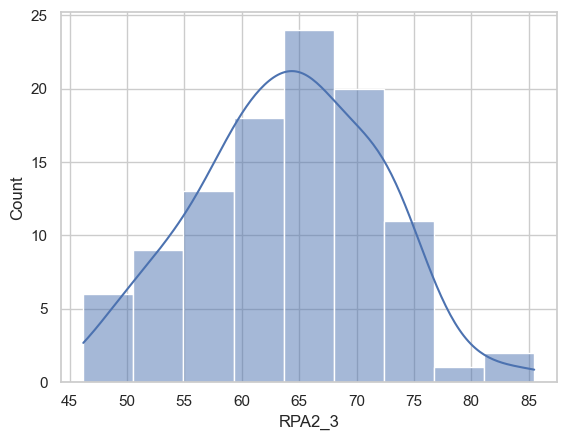

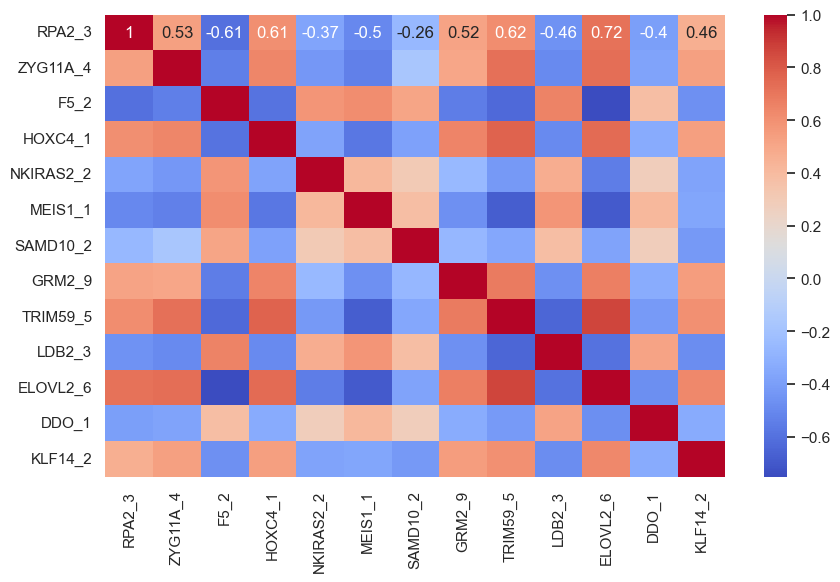

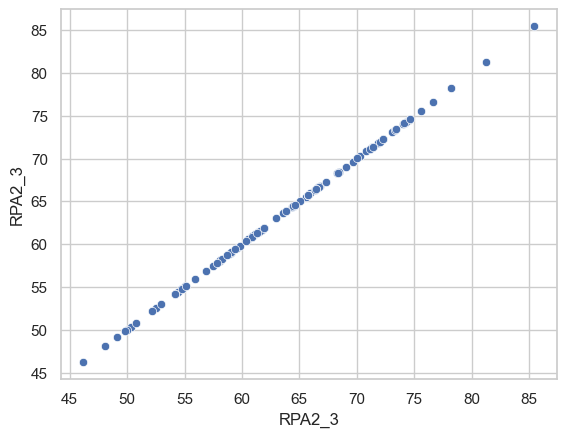

In [38]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
@st.cache_data
def load_data():
    df = pd.read_csv("C:/Users/aditi/Downloads/test_rows.csv")  # Replace with your dataset
    return df

df = load_data()

# Sidebar options
st.sidebar.title("Genomic Data Analysis")
selected_feature = st.sidebar.selectbox("Select Feature to Visualize", df.columns)

# Main Title
st.title("Genomic Data Visualization Dashboard")

# Display Data
st.write("### Preview of Data")
st.dataframe(df.head())

# Univariate Analysis
st.write(f"### Distribution of {selected_feature}")
fig, ax = plt.subplots()
sns.histplot(df[selected_feature], kde=True, ax=ax)
st.pyplot(fig)

# Correlation Heatmap
st.write("### Feature Correlation Matrix")
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", ax=ax)
st.pyplot(fig)

# Scatter Plot for Multivariate Analysis
if len(df.columns) > 2:
    feature_x = st.sidebar.selectbox("Select X-axis Feature", df.columns)
    feature_y = st.sidebar.selectbox("Select Y-axis Feature", df.columns)
    
    st.write(f"### Scatter Plot: {feature_x} vs {feature_y}")
    fig, ax = plt.subplots()
    sns.scatterplot(x=df[feature_x], y=df[feature_y], ax=ax)
    st.pyplot(fig)